<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/Supervised_Learning_Classification_Binary_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Classification (Binary)
### Keras dataset: Titanic

### Historical Background

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This means that the survival rate was 32%. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


### Introduction

The provided dataset has 12 columns with 714 data points. There are several columns which have a few or a lot of missing data. The objective of this data science project is to carry out the following steps:

+ Classification of outcome as correlated to different classes
+ Evaluation of classes having a stronger or a weaker correlation with the outcome
+ Conversion of entries from text to numerical values
+ Completion of missing values through estimation
+ Correction of values for errors through estimation or elimination from analysis
+ Creation of new features from existing features
+ Charting to visualize the nature of the data and solution


### Optimizations
To accomplish the data science goals, a neural network was constructed from scratch. The following optimizations were carried out.

| Model | Optimizer | Metric | Epochs | Layers | Layer 1 | Layer 2 | Layer 3 | Layer 4 | Layer 5 | Error: Train | Error: Test | Change | Improvement |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | RMSProp | MAE | 100 | 2 | 4 | 8 | - | - | - | 0.2472 | 0.2767 | Base | - |
| 2 | Adam | MAE | 100 | 2 | 4 | 8 | - | - | - | 0.2538 | 0.2797 | Optimizer | No |
| 3 | Adam | MAE | 100 | 2 | 8 | 16 | - | - | - | 0.2346 | 0.2645 | Nodes | Yes |
| 4 | Adam | MAE | 100 | 3 | 8 | 16 | 16 | - | - | 0.2122 | 0.2538 | Layers | Yes |
| 5 | Adam | MAE | 100 | 2 | 8 |  8 | - | - | - | 0.2786 | 0.3181 | Nodes | No |
| 6 | Adam | MAE | 100 | 3 | 8 |  8 | 16 | - | - | 0.2096 | 0.2492 | Nodes | Yes | 
| 7 | Adam | MAE | 100 | 3 | 8 |  8 |  8 | - | - | 0.2277 | 0.2667 | Nodes | No |
| 8 | Adam | MAE | 100 | 4 | 8 |  8 |  8 | 16 | - | 0.2205 | 0.2672 | Layers | No |
| 9 | Adam | MAE | 100 | 3 |16 | 16 | 16 | - | - | 0.1978 | 0.2584 | Layers | No |
|10 | Adam | MAE | 100 | 3 | 8 |  8 |  4 | - | - | 0.213 | 0.2653 | Nodes | No |
|11 | Adam | MAE | 100 | 2 |16 |  8 |  - | - | - | 0.2183 | 0.2569 | Nodes | No |
|12 | Adam | MAE | 100 | 3 |16 |  8 | 16 | - | - | 0.2047 | 0.2558 | Nodes | No |
|13 | Adam | MAE | 100 | 5 |16 |  8 |  4 | 8 | 16 | 0.1976 | 0.2462 | Nodes | Yes | 

### Conclusion
The analysis was stopped when the training and testing accuracy was 80.24% and 75.38%. This was accomplish through use of Adam optimizer, mean absolute error as the accuracy metric, and a five layer neural network whose architecture was inspired by auto-encoders.

In [0]:
! pip install keras

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

In [0]:
ds = pd.read_csv('../data/titanic/train.csv')

### Identifying columns with missing data

In [0]:
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
df = ds.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(df.columns, "\n")
print(df.head(), "\n")
print(df.isna().sum())

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object') 

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


### Encoding gender as numbers 

In [0]:
genderMap = {'male':0,
            'female':1}
df.Sex = df.Sex.map(genderMap)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [0]:
df.Sex.head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

### Dropping rows which have missing values (age)

In [0]:
df = df.dropna(axis=0)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Overall statistics of the data frame

In [0]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [0]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(df.values[:, 1:], df.values[:, 0])
print(x_train.shape, Y_train.shape)
print(x_test.shape, Y_test.shape)

(535, 6) (535,)
(179, 6) (179,)


In [0]:
np.unique(Y_test)

array([0., 1.])

### Data Visualization

**Visually inspecting correlation between ticket prices and passenger class distribution**

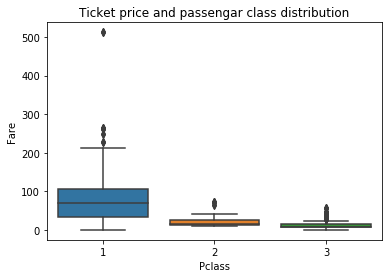

In [0]:
sns.boxplot('Pclass','Fare',data=df)
plt.title("Ticket price and passengar class distribution")
plt.show()

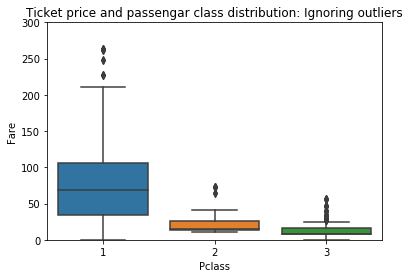

In [0]:
sns.boxplot('Pclass','Fare',data=df)
plt.title("Ticket price and passengar class distribution: Ignoring outliers")
plt.ylim(0, 300) 
plt.show()

**Visually inspecting correlation between ticket prices and survival rate**

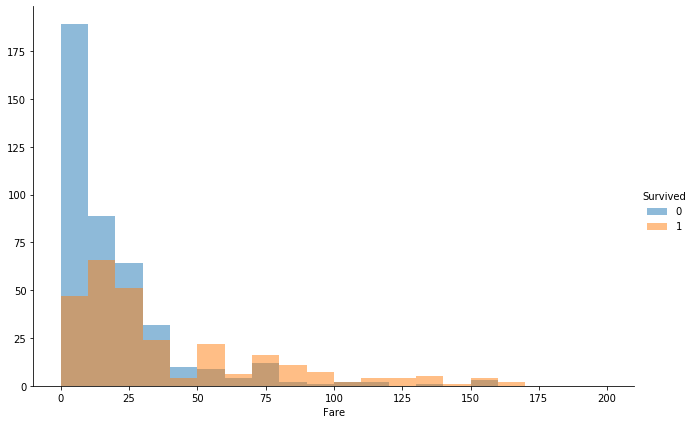

In [0]:
grid = sns.FacetGrid(df, hue='Survived', height=6, aspect=1.5)
grid.map(plt.hist, 'Fare', alpha=.5, bins=range(0,210,10))
grid.add_legend()
plt.show()

### Normalizaton
Normalization speeds up the training process by using the mean and standard deviation of each variable.

In [0]:
print("Pre normalization")
print(x_train.min(), x_train.max())
print(x_test.min(),  x_test.max())
print()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test  = scaler.transform(x_test)

X_train.shape[1]

print("Post normalization")
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

print()

df.head()

Pre normalization
0.0 512.3292
0.0 512.3292

Post normalization
-2.052143221654165 9.655032616957552
-2.029138168893061 9.655032616957552



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


# Building the Model

# Model 1
### Optimizer: RMSProp
### Metric: MAE

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


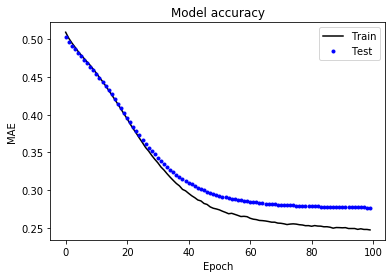

Train - Error in prediction went down from 0.5095999836921692 to 0.24719999730587006
Test  - Error in prediction went down from 0.5029 to 0.2767 



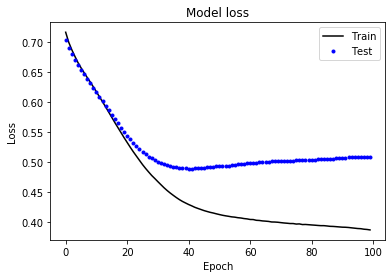

179/179 [==============================] - 0s 71us/step


[0.5089003553603615, 0.27674993872642517]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 


print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

### Model 2

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


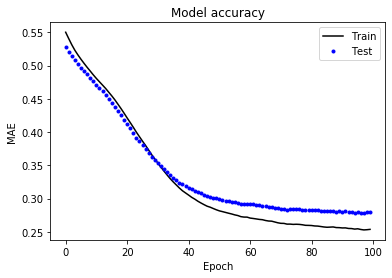

Train - Error in prediction went down from 0.5501000285148621 to 0.25380000472068787
Test  - Error in prediction went down from 0.5287 to 0.2797 



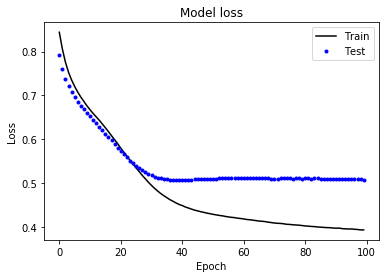

179/179 [==============================] - 0s 125us/step


[0.508576111920053, 0.2797061800956726]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

# Model 3

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


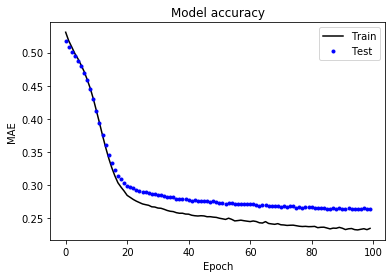

Train - Error in prediction went down from 0.5307000279426575 to 0.2345999926328659
Test  - Error in prediction went down from 0.5167 to 0.2645 



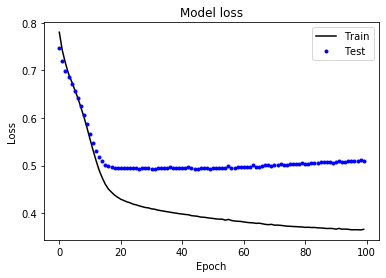

179/179 [==============================] - 0s 74us/step


[0.5087553687268795, 0.26448819041252136]

In [0]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 4

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


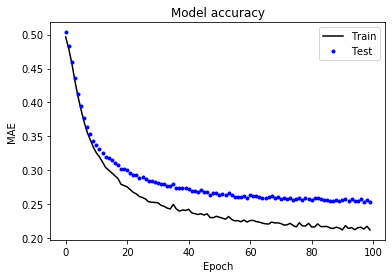

Train - Error in prediction went down from 0.4964999854564667 to 0.21220000088214874
Test  - Error in prediction went down from 0.5034 to 0.2538 



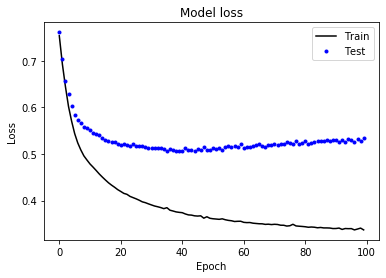

179/179 [==============================] - 0s 254us/step


[0.5339417835520632, 0.2537831962108612]

In [0]:
model = Sequential() 
model.add(Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 5

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


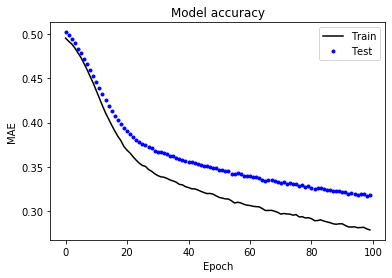

Train - Error in prediction went down from 0.49559998512268066 to 0.2786000072956085
Test  - Error in prediction went down from 0.5023 to 0.3181 



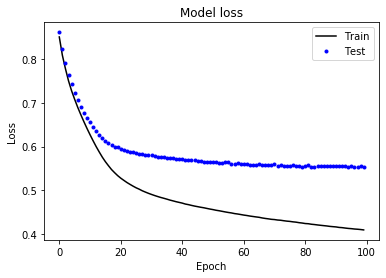

179/179 [==============================] - 0s 51us/step


[0.5540808054654958, 0.3180500566959381]

In [0]:
model = Sequential() 
model.add(Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

# Model 6

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


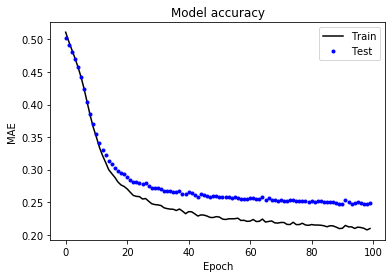

Train - Error in prediction went down from 0.5109999775886536 to 0.20960000157356262
Test  - Error in prediction went down from 0.5015 to 0.2492 



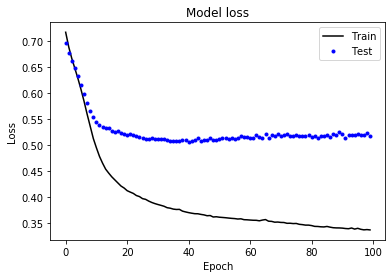

179/179 [==============================] - 0s 145us/step


[0.5175019064762073, 0.24922604858875275]

In [0]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

# Model 7

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


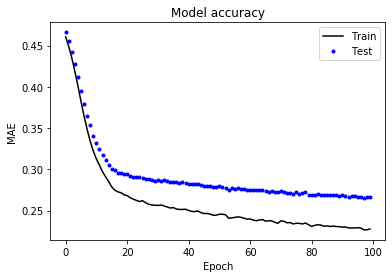

Train - Error in prediction went down from 0.46059998869895935 to 0.22769999504089355
Test  - Error in prediction went down from 0.4662 to 0.2667 



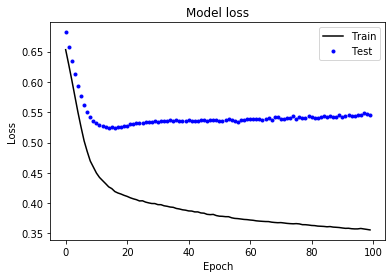

179/179 [==============================] - 0s 50us/step


[0.5461093864960378, 0.2667234241962433]

In [0]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

# Model 8

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


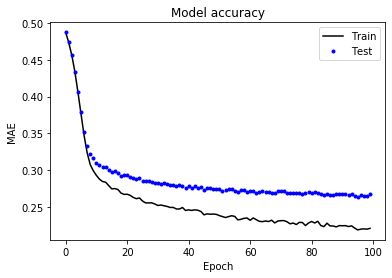

Train - Error in prediction went down from 0.4875999987125397 to 0.22050000727176666
Test  - Error in prediction went down from 0.4877 to 0.2672 



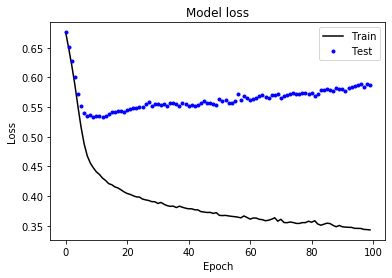

179/179 [==============================] - 0s 48us/step


[0.5870837542597808, 0.26715755462646484]

In [0]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

# Model 9

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


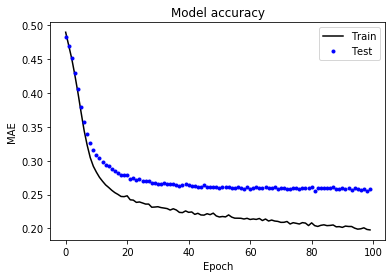

Train - Error in prediction went down from 0.48989999294281006 to 0.19779999554157257
Test  - Error in prediction went down from 0.4833 to 0.2584 



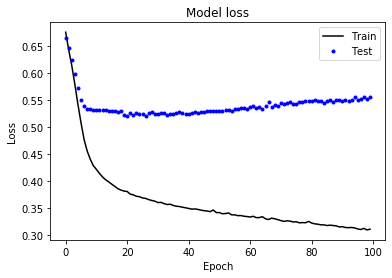

179/179 [==============================] - 0s 49us/step


[0.5551383080762192, 0.25838702917099]

In [0]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

# Model 10

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


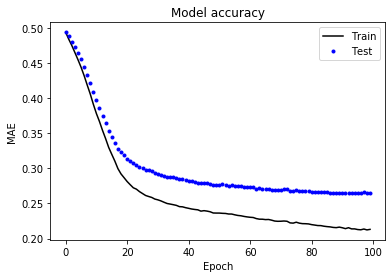

Train - Error in prediction went down from 0.4936999976634979 to 0.21299999952316284
Test  - Error in prediction went down from 0.4938 to 0.2653 



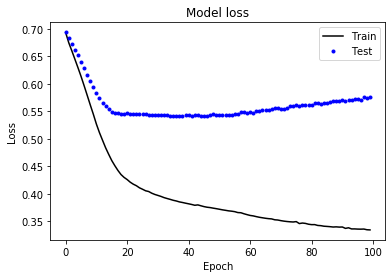

179/179 [==============================] - 0s 64us/step


[0.5762081137915563, 0.2653036415576935]

In [0]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

# Model 11

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


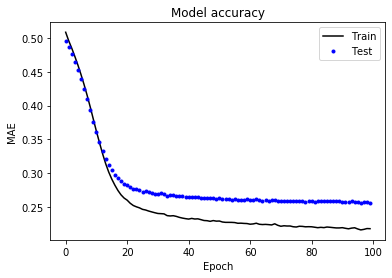

Train - Error in prediction went down from 0.5083000063896179 to 0.218299999833107
Test  - Error in prediction went down from 0.4958 to 0.2569 



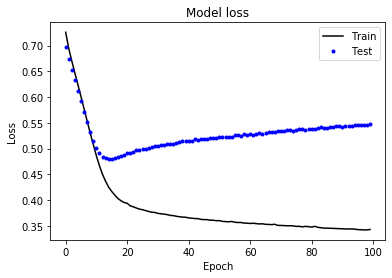

179/179 [==============================] - 0s 53us/step


[0.5474260779066459, 0.25692370533943176]

In [0]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

# Model 12

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


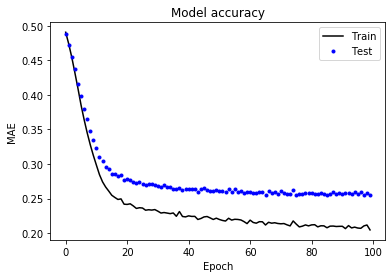

Train - Error in prediction went down from 0.49050000309944153 to 0.20469999313354492
Test  - Error in prediction went down from 0.4882 to 0.2558 



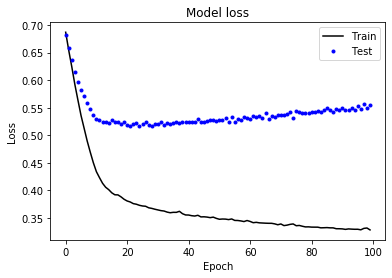

179/179 [==============================] - 0s 48us/step


[0.5553868101628799, 0.2557547092437744]

In [0]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

# Model 13

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


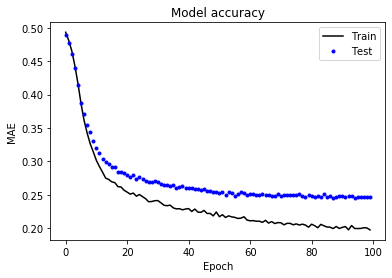

Train - Error in prediction went down from 0.4932999908924103 to 0.19760000705718994
Test  - Error in prediction went down from 0.4886 to 0.2462 



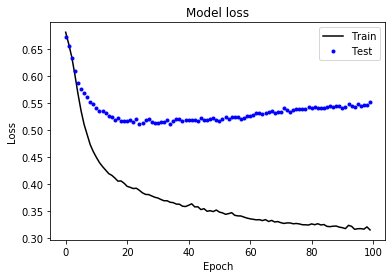

179/179 [==============================] - 0s 49us/step


[0.5514829839741051, 0.2462291121482849]

In [0]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100, 
                    shuffle = True) 

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 